In [2]:
## Import Required Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn.preprocessing import FunctionTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn import metrics
import warnings
warnings.filterwarnings("ignore")

In [3]:
## Now lets import the Airline dataset.

In [4]:
df = pd.read_csv("D:\Projects Datasets/Invistico_Airline.csv")
df

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,satisfied,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,...,2,3,3,0,3,5,3,2,0,0.0
1,satisfied,Male,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,...,2,3,4,4,4,2,3,2,310,305.0
2,satisfied,Female,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,...,2,2,3,3,4,4,4,2,0,0.0
3,satisfied,Female,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,...,3,1,1,0,1,4,1,3,0,0.0
4,satisfied,Female,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,...,4,2,2,0,2,4,2,5,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,satisfied,Female,disloyal Customer,29,Personal Travel,Eco,1731,5,5,5,...,2,2,3,3,4,4,4,2,0,0.0
129876,dissatisfied,Male,disloyal Customer,63,Personal Travel,Business,2087,2,3,2,...,1,3,2,3,3,1,2,1,174,172.0
129877,dissatisfied,Male,disloyal Customer,69,Personal Travel,Eco,2320,3,0,3,...,2,4,4,3,4,2,3,2,155,163.0
129878,dissatisfied,Male,disloyal Customer,66,Personal Travel,Eco,2450,3,2,3,...,2,3,3,2,3,2,1,2,193,205.0


In [4]:
## Okay so let's simply eliminate all of the duplicate datapoints from the dataset.

In [5]:
df.drop_duplicates(inplace=True)

In [5]:
## Lets create the target and feature dataframe.

In [6]:
target = pd.DataFrame(df['satisfaction'])
feature = df.drop('satisfaction', axis = 1)

In [7]:
target['satisfaction'] = target['satisfaction'].replace('satisfied','1')
target['satisfaction'] = target['satisfaction'].replace('dissatisfied','0')
target['satisfaction'] = target['satisfaction'].astype('int64')

In [6]:
## Splitting of Train & Test Data.

In [8]:
X_train, X_test, y_train, y_test = train_test_split(feature, target, test_size=0.2, random_state=25)

In [7]:
## Now further splitting of feature dataframe is done on the basis of discrete, continuous and categorical data.

In [9]:
discrete_num = [col for col in X_train.columns if X_train[col].dtype !='O' and X_train[col].nunique() <= 10]
print(discrete_num)
print('No. of discrete variable: ', len((discrete_num)))

['Seat comfort', 'Departure/Arrival time convenient', 'Food and drink', 'Gate location', 'Inflight wifi service', 'Inflight entertainment', 'Online support', 'Ease of Online booking', 'On-board service', 'Leg room service', 'Baggage handling', 'Checkin service', 'Cleanliness', 'Online boarding']
No. of discrete variable:  14


In [10]:
conti_num = [col for col in X_train.columns if X_train[col].dtype !='O' and X_train[col].nunique() > 10]
print(conti_num)
print('No. of continuous variable: ', len(conti_num))

['Age', 'Flight Distance', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']
No. of continuous variable:  4


In [11]:
cat_var = [col for col in X_train.columns if X_train[col].dtype =='O']
print(cat_var)
print('No. of categorical variable: ', len(cat_var))
ohe = ['Gender', 'Customer Type', 'Type of Travel']
oe = ['Class']

['Gender', 'Customer Type', 'Type of Travel', 'Class']
No. of categorical variable:  4


In [8]:
## Outliers are removed from the features that are identified in box plot.

In [12]:
for i in ['On-board service', 'Checkin service']:
    outlier = X_train[X_train[i]<2].index
    X_train.drop(outlier, axis = 0, inplace = True)
    y_train.drop(outlier, axis = 0, inplace = True)

In [13]:
for i in conti_num:
    q1, q3 = np.percentile(X_train[i],[25,75])
    iqr = q3 - q1
    lower = q1 - 1.5*iqr
    higher = q3 + 1.5*iqr
    outlier = X_train[X_train[i]>higher].index.append(X_train[X_train[i]<lower].index)
    X_train.drop(outlier, axis = 0, inplace = True)
    y_train.drop(outlier, axis = 0, inplace = True)

In [9]:
## Creation of pipeines to fill missing values and categorical encoding according to datatypes.


In [14]:
discrete_num_pipeline = Pipeline([
    ('impute', SimpleImputer(strategy = 'most_frequent')),
    ('scalar', StandardScaler())
])
conti_num_pipeline = Pipeline([
    ('impute', SimpleImputer(strategy = 'median')),
    ('scalar', StandardScaler())
])
cat_ohe_pipeline = Pipeline([
    ('impute', SimpleImputer(strategy = 'most_frequent')),
    ('ohe', OneHotEncoder(handle_unknown='ignore'))
])
cat_oe_pipeline = Pipeline([
    ('impute', SimpleImputer(strategy = 'most_frequent')),
    ('oe', OrdinalEncoder())
])

In [10]:
## Now, transformation is used to pass discrete and continuous variables in their respective pipelines and then fit and transform the processed data in feature variable.

In [15]:
transformer = ColumnTransformer(transformers=
    [
    ('tnf1', discrete_num_pipeline, discrete_num),
    ('tnf2', conti_num_pipeline, conti_num),
    ('tnf3', cat_oe_pipeline, oe),
    ('tnf4', cat_ohe_pipeline, ohe)
], remainder = 'passthrough')

In [11]:
## Lets create our training and test dataset.

In [16]:
X_train = transformer.fit_transform(X_train)
X_test = transformer.transform(X_test)

In [18]:
# def evaluate_model(true,predicted):
#     acc = accuracy_score(true, predicted)
#     matrix = confusion_matrix(true, predicted)
#     report = classification_report(true, predicted)
#     return acc

In [15]:
## Okay so now check the train and test accuracy of classification models.

In [19]:
models = {
    "Logistic_Regression":LogisticRegression(),
    "KNeighbors_Classifier":KNeighborsClassifier(),
    "RandomForest_Classifier":RandomForestClassifier(),
    "GradientBoosting_Classifier":GradientBoostingClassifier(),
    "XGB_Classifier":XGBClassifier()
}
model_list =[]

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train,y_train)
    
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    train_acc = evaluate_model(y_train,y_train_pred)
    test_acc = evaluate_model(y_test,y_test_pred)
    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance on training set:')
    print("Train accuracy: {:.4f}".format(train_acc))
    # print("Confusion matrix: {}".format(matrix_train))
    # print("Classification report: {}".format(report_train))
    
    print("----------------------------------------")
    
    print('Model performance on test set:')
    print("Test accuracy: {:.4f}".format(test_acc))
    # print("Confusion matrix: {}".format(matrix_test))
    # print("Classification report: {}".format(report_test))
    # print("AUC score: {:.4f}".format(auc_score))
    
    print("="*40)
    print('\n')    


Logistic_Regression
Model performance on training set:
Train accuracy: 0.8440
----------------------------------------
Model performance on test set:
Test accuracy: 0.8296


KNeighbors_Classifier
Model performance on training set:
Train accuracy: 0.9474
----------------------------------------
Model performance on test set:
Test accuracy: 0.9038


RandomForest_Classifier
Model performance on training set:
Train accuracy: 1.0000
----------------------------------------
Model performance on test set:
Test accuracy: 0.9531


GradientBoosting_Classifier
Model performance on training set:
Train accuracy: 0.9317
----------------------------------------
Model performance on test set:
Test accuracy: 0.9233


XGB_Classifier
Model performance on training set:
Train accuracy: 0.9740
----------------------------------------
Model performance on test set:
Test accuracy: 0.9529




In [13]:
## Out of all models XGBClassifier is having best accuracy.

In [20]:
clsf = XGBClassifier()
clsf.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [21]:
train_pred = clsf.predict(X_train)
train_accuracy = accuracy_score(train_pred, y_train)
train_accuracy

0.9740279915827531

In [22]:
test_prediction = clsf.predict(X_test)
test_accuracy = accuracy_score(test_prediction, y_test)
test_accuracy

0.9528795811518325

In [16]:
## Confusion matrix is plotted to measure the performance of XGBClassifier by identifying the total number of correct and incorrect predictons, as true negative and positive, false negative and positive

In [23]:
matrix = confusion_matrix(y_test,test_prediction)
matrix

array([[11195,   536],
       [  688, 13557]], dtype=int64)

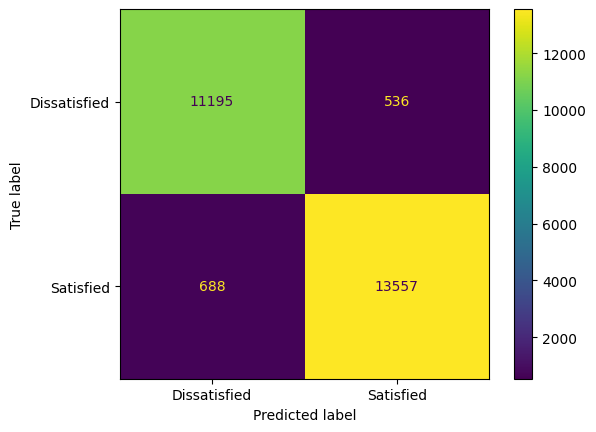

In [24]:
plot = ConfusionMatrixDisplay(matrix, display_labels=['Dissatisfied','Satisfied'] )
plot.plot()

In [17]:
## Classification report is imported to measure performance of metric by observing precision, recall, f1-score and support values. Used to limit the values of FP, FN and both precision and recall.

In [25]:
report = classification_report(test_prediction, y_test)
print(report)

              precision    recall  f1-score   support

           0       0.95      0.94      0.95     11883
           1       0.95      0.96      0.96     14093

    accuracy                           0.95     25976
   macro avg       0.95      0.95      0.95     25976
weighted avg       0.95      0.95      0.95     25976



In [19]:
## Probability of test data is predicted and threshold value is used to separated satisfied and dissatisfied customers. Generally 0.5 is the default threshold value.
## Roc-auc curve is plotted between true positive rate and false positive rate.

In [26]:
y_pred_proba = clsf.predict_proba(X_test)[:,1]
y_pred_proba

array([2.7582405e-02, 9.9946100e-01, 6.9632834e-01, ..., 8.9729037e-05,
       9.9979693e-01, 9.9061853e-01], dtype=float32)

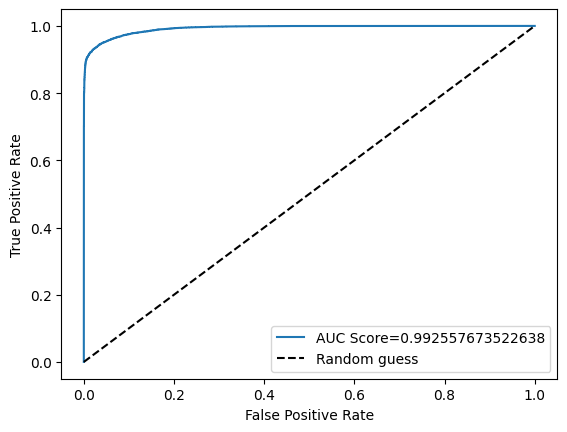

In [27]:
fpr, tpr, threshold = metrics.roc_curve(y_test,  y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr, tpr, label="AUC Score="+str(auc))
plt.plot([0, 1], [0, 1], 'k--', label='Random guess')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

In [20]:
## Conclusion
## So far airlines are doing great in satisfying the needs of the passenger, in future to secure more of number of passengers, airlines have to work on some areas like reduce delay and waiting time in departure/arrival time, efficient location of gates and should provide good quality of food and drinks at affordable price.
## Airlines should focus more on the area of interest of age group between 20-45 as they are more frequent travellers apart from the its average flight distance is about 2000km so efficent use of fuel should be practised and should try to provide more comfort in personal travels and economic class in order to increase their satisfactory rate.
## To achieve this task XGBClassifier model is doing good job by predicting the customers segments in varying conditions.